In [1]:
!rm -r /content/Learning
!git clone https://github.com/valeman100/Learning.git
import sys
sys.path.append('/content/Learning/Fundamentals_For_Learning_Folder/') 
import Fundamentals_For_Learning as FFL
from torch import nn

Cloning into 'Learning'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 54 (delta 12), reused 48 (delta 12), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
train_dl, val_dl, test_dl = FFL.data_preparation(batch=128, resize=(224,224))

60000 10000 375 94 79


In [3]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)


class VGG(FFL.LeNet):
    def __init__(self, arch, num_classes=10):
        super().__init__()
        conv_blocks = []
        in_channels = 1
        for (num_convs, out_channels) in arch:
            conv_blocks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(*conv_blocks, nn.Flatten(), 
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
                                 nn.LazyLinear(num_classes)
                                 )



In [4]:
model, loss_f = FFL.get_model(VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))), (1,1,224,224))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


X output shape:	 torch.Size([1, 1, 224, 224])
Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])

 Number of parameters: 128806154


In [5]:
train_loss, val_loss, acc = FFL.fit(train_dl, val_dl, test_dl, loss_f, model, lr=0.01, epochs=10)

Epoch: 0, loss = 1.7425536338488261, v_loss = 0.6520234695140351, accuracy = 0.7480221390724182
Epoch: 1, loss = 0.6386778601010641, v_loss = 0.4755707009041563, accuracy = 0.8161590099334717
Epoch: 2, loss = 0.5000491422812144, v_loss = 0.4133224129042727, accuracy = 0.835344135761261
Epoch: 3, loss = 0.43547659675280254, v_loss = 0.3703023889597426, accuracy = 0.8539358973503113
Epoch: 4, loss = 0.3938241846958796, v_loss = 0.34091712312495454, accuracy = 0.8641218543052673
Epoch: 5, loss = 0.36884004970391593, v_loss = 0.3286112916279346, accuracy = 0.8675830960273743
Epoch: 6, loss = 0.3486682999531428, v_loss = 0.30952965816918837, accuracy = 0.8724287748336792
Epoch: 7, loss = 0.33158938376108804, v_loss = 0.2894830776655928, accuracy = 0.8820213675498962
Epoch: 8, loss = 0.3141127659479777, v_loss = 0.28139237457133354, accuracy = 0.8836036324501038
Epoch: 9, loss = 0.30377171738942466, v_loss = 0.27053942895950156, accuracy = 0.8857792615890503


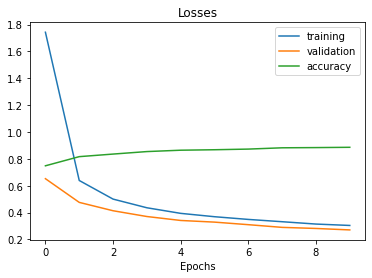

In [8]:
#FFL.after_training_plots(train_loss, val_loss, acc)
import matplotlib.pyplot as plt
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
plt.plot(acc, label='accuracy')

plt.legend()
plt.title('Losses')
plt.xlabel("Epochs")
plt.show()

In [12]:
X, y = next(iter(test_dl))
FFL.model_test(X, y, model)

prediction comparision:

 tensor([ True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
        False,  True,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  T

In [7]:
#FFL.torch.save(model.state_dict(), "/content/Learning/VGG_trained.pt")
model.load_state_dict(FFL.torch.load("/content/Learning/VGG_trained.pt"))